### Group: Emma and Frankie
KNN Regression

In [13]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Import data and take a very quick look at it
jmadata = pd.read_csv("./Data/jma_nitrate.csv")
jmadata.columns

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')

In [15]:
# Import Argo data without nitrate
bgcdata = pd.read_csv('./Data/kuro_BGCargo_noNO3.csv')
bgcdata.columns

Index(['Date/GMT', 'Days since 1/1/1900', 'DEPTH[M]', 'PRESSURE[DBAR]', 'NA',
       'SALINITY[PSS]', 'TEMPERATURE[C]', 'SIGMATHETA[KG/M3]',
       'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')

In [16]:
# Import Argo nitrate data
bgcno3data = pd.read_csv('./Data/kuro_BGCargo_NO3.csv')
bgcno3data.columns

Index(['Date/GMT', 'Days since 1/1/1900', 'NITRATE[uMOL/KG]', 'DEPTH[M]',
       'PRESSURE[DBAR]', 'NA', 'SALINITY[PSS]', 'TEMPERATURE[C]',
       'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')

## Part 1 (20 points): EDA ## 

Before you apply your model, assess the level of overlap between the range of environmental conditions represented in the JMA and BGC Argo data sets.

Compare the geographical extent, depth range, water masses, seasonal coverage and any other factors that you think could be pertinent between the two data sets.
Describe similarities and highlight differences.

In [17]:
# Since we have a NaN value for nitrate (-999) we need to get rid of that
jmadata = jmadata[jmadata['nitrate']>0]

In [18]:
jmadata.describe()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,year,month,day,profile,density
count,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000
mean,8175.135932,7.042844,34.433404,1418.388211,26.855277,151.599624,32.696928,2012.313664,6.851034,13.509375,268.636766,26.574613
std,4675.484666,7.113994,0.354281,1528.846644,15.480812,9.692016,8.979100,1.684952,2.660677,8.723439,148.651926,1.221275
min,0.000000,0.034400,32.349200,0.000000,0.010000,133.990833,0.332167,2010.000000,2.000000,1.000000,1.000000,20.951302
25%,4105.250000,1.589650,34.240600,203.000000,11.250000,145.727833,30.003333,2011.000000,5.000000,6.000000,139.000000,25.882225
50%,8228.500000,3.418650,34.550800,803.000000,35.350000,148.149667,34.239500,2012.000000,7.000000,12.000000,275.000000,27.094050
75%,12223.750000,12.294850,34.681800,2002.000000,39.797500,164.231000,39.660833,2013.000000,9.000000,20.000000,394.000000,27.527512
max,16220.000000,29.923300,35.548100,6161.000000,45.330000,170.035167,49.991500,2016.000000,12.000000,31.000000,529.000000,27.681606


In [19]:
bgcdata.describe()

,Days since 1/1/1900,DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,1.613600e+04,1.613600e+04,16136.000000,16136.000000
mean,42033.532222,-276.153707,-278.469741,6.720191,34.476596,14.046241,25.635727,inf,inf,167.317041,33.298311
std,404.512161,255.841439,258.212597,3.357582,0.267405,5.421896,0.922911,inf,inf,6.650333,1.943762
min,41335.568000,-990.493000,-999.800000,1.000000,33.675300,3.018000,21.966000,2.280000e+01,7.100000e+00,148.325000,30.092000
25%,41684.360000,-348.988500,-351.730000,4.000000,34.271800,10.776225,25.184000,1.915000e+02,7.330000e+01,163.251000,31.765000
50%,42034.303000,-200.253000,-201.765000,7.000000,34.537900,15.179800,25.601000,2.127000e+02,8.650000e+01,169.269000,32.565000
75%,42382.406000,-76.392250,-76.947500,10.000000,34.688225,17.509325,26.225000,2.281000e+02,9.770000e+01,171.610000,34.901000
max,42736.536000,-4.061000,-4.090000,12.000000,35.350200,27.426200,27.410000,1.790000e+308,1.790000e+308,176.199000,37.759000


In [ ]:
# Make a map
    # Data density by profile
# Make histogram for the depth ranges
# T-S Diagram
# Look at dates - data density associated with season
# Look at other variables as needed

## Part 2 (40 points): Model application and evaluation

Apply your nitrate model trained on the JMA dataset to the BGC Argo data to estimate nitrate concentrations based on your input variables (e.g. temperature, salinity, etc…).

Compare the observed BGC Argo nitrate to the values predicted by your model.

Report the r2 score and RMSE (root mean squared error).
Does your model perform consistently well, or are there any noticeable outliers? If there are, identify those data points and suggest reasons why you think that your model performs less well for those points.

In [20]:
# Make the data split
y = jmadata.nitrate
X = jmadata[['density','depth','sal']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
# test size is the percentage of test points you want, random state is the "seed" number so people can reproduce what you have done

In [21]:
# just to look and check them
len(X_test)

3115

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [23]:

# pick model
n  = int(input('Choose a number for k: '))

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=n)
model.fit(standardized_X, y_train)

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(standardized_X, y_train)))

# plot the model together with the data
y_pred = model.predict(standardized_X_test)

#plt.scatter(standardized_X, y_train)
#plt.plot(standardized_X_test,y_pred)
#plt.show()

from sklearn.metrics import mean_squared_error, r2_score


print('r2 =', r2_score(y_train, model.predict(standardized_X)))
print('r2 =', r2_score(y_test, y_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test, y_pred)))
# we want to minimize RMSE with our model (its how good our model is)

Choose a number for k: 10
R^2 score: 0.99
r2 = 0.9928389816294825
r2 = 0.9908948862262515
RMSE = 1.4722971877269766


In [32]:
# For loop to find the best model k
k = []
r2_train = []
r2_test = []
RMSE = []

loops = range(1,31)

for n in loops:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(standardized_X, y_train)

    # Use the model to predict y (nitrate values)
    y_pred = model.predict(standardized_X_test)
    
    # Form our lists to plot
    k.append(n)
    r2_train.append(r2_score(y_train, model.predict(standardized_X)))
    r2_test.append(r2_score(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Text(0, 0.5, 'r2 for test')

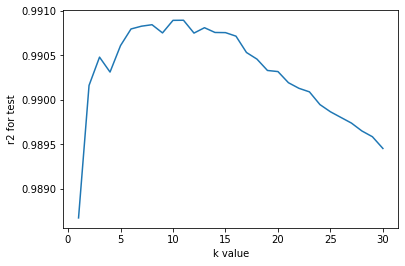

In [33]:
plt.plot(k,r2_test)
plt.xlabel('k value')
plt.ylabel('r2 for test')

Text(0, 0.5, 'RMSE')

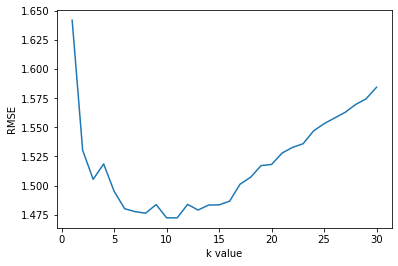

In [29]:
plt.plot(k,RMSE)
plt.xlabel('k value')
plt.ylabel('RMSE')

When running with 100 versions of k (1-100) shows that RMSE increases and r2 decreases after around 30. Thus, we ran the loop again with only 1-30 for k. 

In [ ]:
# Run the model at k = 10 and plot to check for overfitting (will follow the outliers exactly)

test the evaluate the r^2 of the model with the bcg argo data. 